<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/FlightfarePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df=pd.read_excel("Data_Train.xlsx")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_df.shape

(10683, 11)

In [8]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_df.dropna(inplace=True)

#EDA

In [11]:
train_df['Journy_Day'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.day

In [12]:
train_df['Journy_Month'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [13]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_Day,Journy_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
train_df.drop(['Date_of_Journey'],inplace=True,axis=1)

In [16]:
train_df.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [17]:
## Departure time is when the plane leaves the gate

train_df['Dep_hour'] = pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['Dep_min'] = pd.to_datetime(train_df.Dep_Time).dt.minute

train_df.drop(['Dep_Time'], axis=1, inplace=True)

In [18]:

train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_min'] = pd.to_datetime(train_df.Arrival_Time).dt.minute

train_df.drop(['Arrival_Time'], axis=1, inplace=True)

In [20]:
## Assigning and converting Duration column into list
duration = list(train_df.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                       # Check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adding 0 mins
        else:
            duration[i] = "0h " + duration[i]


duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_mins.append((int(duration[i].split("h")[0])*60)+int(duration[i].split('m')[0].split()[-1]))    # Extract mins from Duration

In [21]:
train_df["Duration_mins"] = duration_mins

In [22]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,285


In [23]:
train_df.drop(['Duration'], axis=1, inplace=True)

#Categorical Variables

In [24]:
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

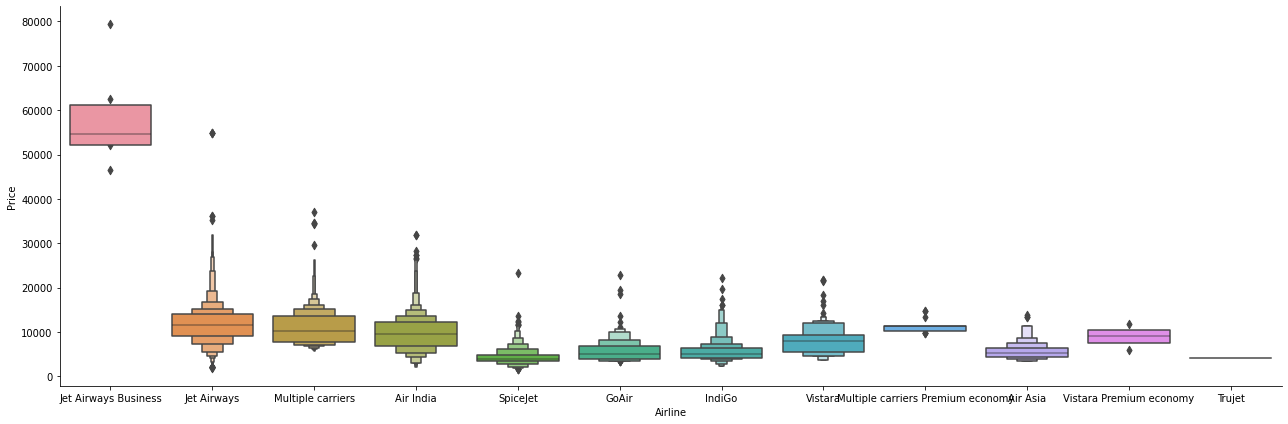

In [25]:
sns.catplot(y="Price", x="Airline", data=train_df.sort_values("Price", ascending=False), kind='boxen', height=6, aspect=3)

In [26]:
Airline = train_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

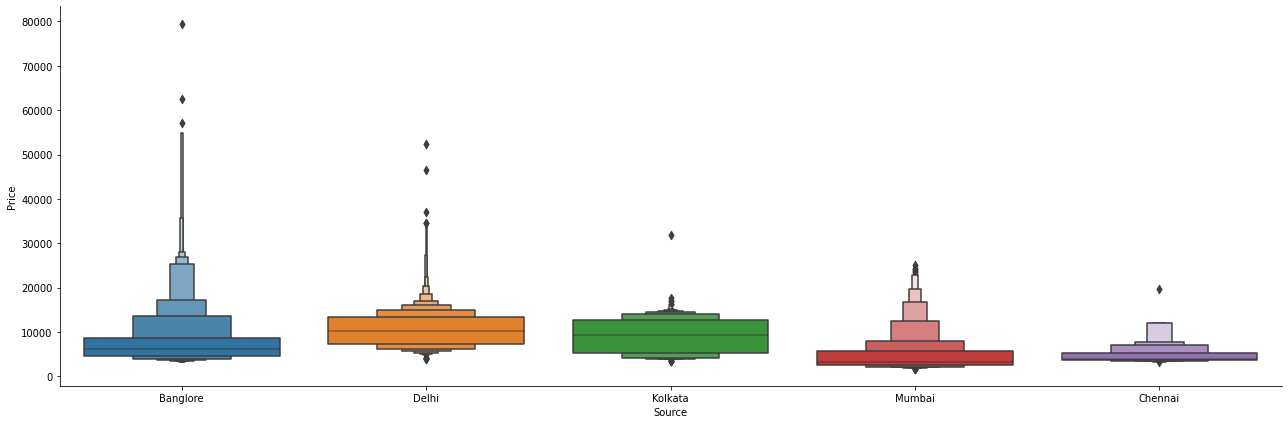

In [28]:
sns.catplot(y='Price', x='Source', data=train_df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)

In [29]:
Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
train_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
## As this is case of Ordinal Categorical type we perform LabelEncoder
## Here vlaues are assigned with corresponding keys
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [33]:
data_train = pd.concat([train_df, Airline, Source, Destination], axis=1)

In [34]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
data_train.drop(['Destination', 'Source', 'Airline'], axis=1, inplace=True)

In [45]:
test_data = pd.read_excel('Test_set.xlsx')

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_mins.append((int(duration[i].split("h")[0])*60)+int(duration[i].split('m')[0].split()[-1])) 


# Adding Duration column to test set
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

#Feature selection

In [48]:
data_train.head()

,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
data_train.shape

(10682, 29)

In [50]:
data_test.shape

(2671, 27)

In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journy_Day', 'Journy_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [52]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_mins', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [54]:
X = data_train.loc[:, ['Total_Stops', 'Journy_Day', 'Journy_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
                      'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers',
                      'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet',
                      'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
                      'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
                      'Destination_New Delhi']]

In [55]:
X.shape


(10682, 27)

In [56]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

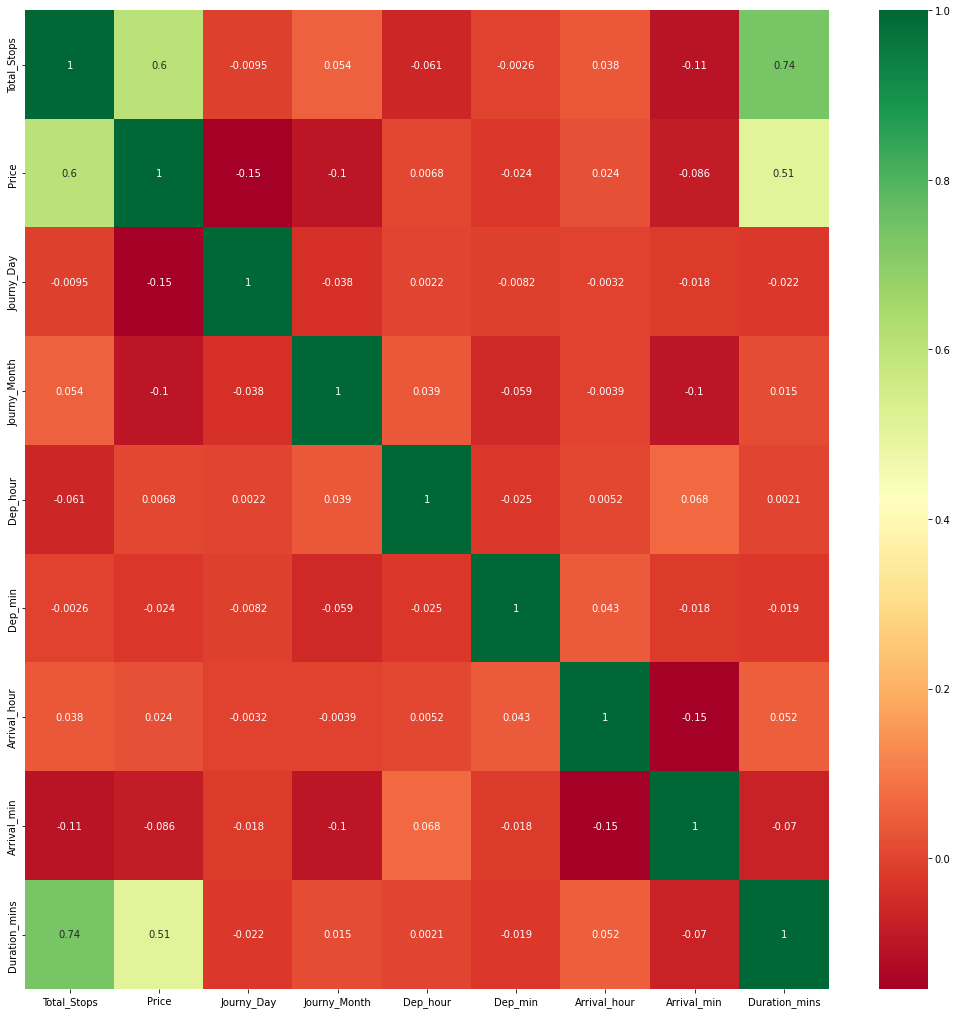

In [57]:
plt.figure(figsize=(18, 18))
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [58]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [59]:
print(selection.feature_importances_)

[2.37382781e-01 1.44281169e-01 5.61949304e-02 2.92494224e-02
 2.82996477e-02 3.62873483e-02 1.18218499e-01 9.76969559e-03
 1.98700962e-03 1.65930599e-02 1.41385758e-01 6.81088234e-02
 1.87670119e-02 8.95561508e-04 2.77364385e-03 9.24464733e-05
 5.11879352e-03 7.33030786e-05 3.22796788e-04 1.27611593e-02
 3.07271232e-03 9.44112414e-03 1.20586940e-02 1.60495973e-02
 5.51850998e-03 5.42701006e-04 2.47538014e-02]


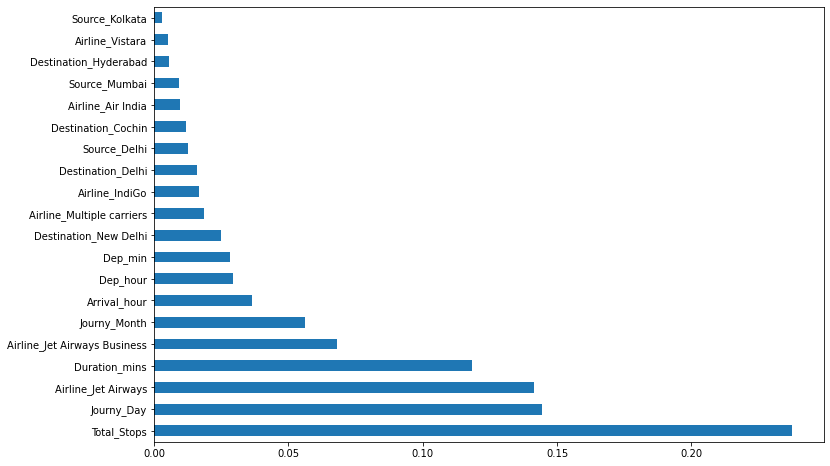

In [60]:
plt.figure(figsize=(12, 8))
feature_imp = pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = rf_model.predict(X_test)

In [65]:
rf_model.score(X_train, y_train)

0.9525252562995079

In [66]:
rf_model.score(X_test, y_test)

0.8168963543047075

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


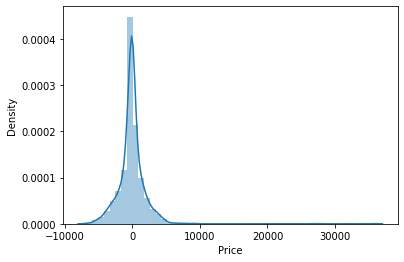

In [67]:
sns.distplot(y_test - y_pred)

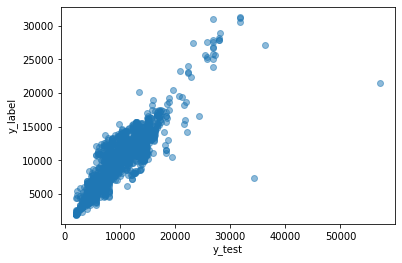

In [68]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_label')
plt.show()

In [69]:
from sklearn import metrics

In [70]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1175.2674492341487
MSE:  3948091.1216412606
RMSE:  1986.980402933371


In [71]:
metrics.r2_score(y_test, y_pred)

0.8168963543047075

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
# Randomized Search CV

## Number of trees in ramdom forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
## Number of features to consider at every split
max_features = ['auto', 'sqrt']
## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
## Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [75]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [76]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [81]:
rf_model_best = RandomForestRegressor(max_depth=20, max_features= 'auto',min_samples_leaf= 1,min_samples_split= 15,n_estimators= 700)
rf_model_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [82]:
y_pred = rf_model_best.predict(X_test)

<Figure size 576x576 with 0 Axes>

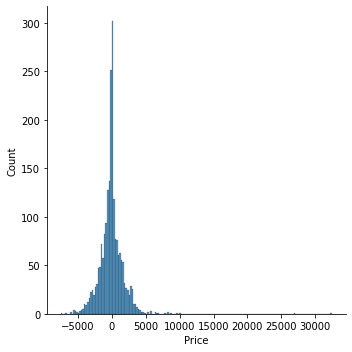

In [83]:
plt.figure(figsize=(8, 8))
sns.displot(y_test-y_pred)
plt.show()

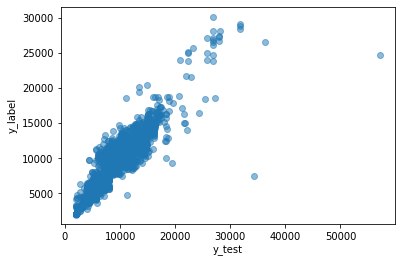

In [84]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_label')
plt.show()

In [85]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1163.7242743946615
MSE:  3575483.770461263
RMSE:  1890.8949654756773


In [86]:
metrics.r2_score(y_test, y_pred)

0.8341770508012872

In [87]:
import pickle

In [89]:
file = open('model.pkl', 'wb')

pickle.dump(rf_model_best, file)

In [90]:
model = pickle.load(open('model.pkl', 'rb'))

In [91]:
y_pred = model.predict(X_test)

In [92]:
metrics.r2_score(y_test, y_pred)

0.8341770508012872